<a href="https://colab.research.google.com/github/MandarBorhade/data_analytics/blob/main/EDA_BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Black Friday EDA & feature engineering**
##Agenda:


*   Cleaning and preparing data for model training





In [2]:
#importing basic libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


##Problem statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
#importing datasets

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [4]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [6]:
df_train.shape

(451748, 12)

In [7]:
df_test.shape

(233599, 11)

In [8]:
#appending test and train data
#NOTE - appending here means we are adding data at the bottom of the first data
df = df_train.append(df_test)
df.shape

(685347, 12)

In [9]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685347 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     685347 non-null  int64  
 1   Product_ID                  685346 non-null  object 
 2   Gender                      685346 non-null  object 
 3   Age                         685346 non-null  object 
 4   Occupation                  685346 non-null  float64
 5   City_Category               685346 non-null  object 
 6   Stay_In_Current_City_Years  685346 non-null  object 
 7   Marital_Status              685346 non-null  float64
 8   Product_Category_1          685346 non-null  float64
 9   Product_Category_2          472672 non-null  float64
 10  Product_Category_3          209209 non-null  float64
 11  Purchase                    451747 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 68.0+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.853470e+05,685346.000000,685346.000000,685346.000000,472672.000000,209209.000000,451747.000000
mean,1.002986e+06,8.082182,0.409616,5.290894,9.846900,12.662696,9328.887933
std,2.105331e+03,6.522276,0.491763,3.744476,5.089991,4.125879,4978.412379
min,1.003000e+03,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001484e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.003012e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004431e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12069.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [12]:
#user_id does not seem necessary. Hence, dropping user_id column
df.drop(columns='User_ID' , inplace=True)

In [13]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0


In [14]:
df.tail(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233597,P00124742,F,46-50,1.0,C,4+,0.0,10.0,16.0,NaN,NaN
233598,P00316642,F,46-50,0.0,B,4+,1.0,4.0,5.0,NaN,NaN


In [15]:
#handling categorical feature gender
#replacing F=0 & M=1

df['Gender'] = df['Gender'].map({'F':0 , 'M':1})

In [16]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0


In [17]:
#handling categorical variable Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [18]:
#handling Age
df['Age'] = df['Age'].map({'0-17' : 1 , '18-25' : 2 , '26-35' : 3 ,'36-45' : 4 ,'46-50' : 5 , '51-55': 6 ,  '55+' : 7})
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0


In [19]:
#handling categorical feature City Category
df_city_category = pd.get_dummies(df['City_Category'])

In [20]:
#handling categorical feature City Category
df = pd.concat([df , df_city_category] , axis=1)

In [21]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,1,0,0
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,1,0,0


In [22]:
#no need of the column city category. Hence, dropping
df.drop(columns = 'City_Category' , inplace=True)

In [23]:
df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,NaN,NaN,8370.0,1,0,0
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,1,0,0


In [24]:
#handling categorical feature Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [25]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'2':2, '4+':4, '3':3, '1':1, '0':0})

In [26]:
df['Stay_In_Current_City_Years'].unique()

array([ 2.,  4.,  3.,  1.,  0., nan])

In [27]:
#other option to replace a string 
# df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

##checking missing values

In [28]:
df.isnull().sum()

Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            212675
Product_Category_3            476138
Purchase                      233600
A                                  0
B                                  0
C                                  0
dtype: int64

In [29]:
#Focus on replacing null values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
#Product_Category_2  is a discrete continous feature. Hence, we can replace null values with mode
df['Product_Category_2'].mode()[0]

8.0

In [31]:
#replacing null values of Product_Category_2 with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [32]:
df['Product_Category_2'].isnull().sum()

0

In [33]:
#considering Product_Category_3 
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [34]:
#Product_Category_3 also seems to be discrete continous feature. Hence, we can replace null values with mode
df['Product_Category_3'].mode()[0]

16.0

In [35]:
#replacing Product_Category_3 with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [36]:
df['Product_Category_3'].isnull().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685347 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  685346 non-null  object 
 1   Gender                      685346 non-null  float64
 2   Age                         685346 non-null  float64
 3   Occupation                  685346 non-null  float64
 4   Stay_In_Current_City_Years  685346 non-null  float64
 5   Marital_Status              685346 non-null  float64
 6   Product_Category_1          685346 non-null  float64
 7   Product_Category_2          685347 non-null  float64
 8   Product_Category_3          685347 non-null  float64
 9   Purchase                    451747 non-null  float64
 10  A                           685347 non-null  uint8  
 11  B                           685347 non-null  uint8  
 12  C                           685347 non-null  uint8  
dtypes: float64(9),

In [38]:
#columns A , B , C has dtype = uint8. Converting the dtype uint8 to int
df['A'] = df['A'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685347 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  685346 non-null  object 
 1   Gender                      685346 non-null  float64
 2   Age                         685346 non-null  float64
 3   Occupation                  685346 non-null  float64
 4   Stay_In_Current_City_Years  685346 non-null  float64
 5   Marital_Status              685346 non-null  float64
 6   Product_Category_1          685346 non-null  float64
 7   Product_Category_2          685347 non-null  float64
 8   Product_Category_3          685347 non-null  float64
 9   Purchase                    451747 non-null  float64
 10  A                           685347 non-null  int64  
 11  B                           685347 non-null  int64  
 12  C                           685347 non-null  int64  
dtypes: float64(9),

##Visualisation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


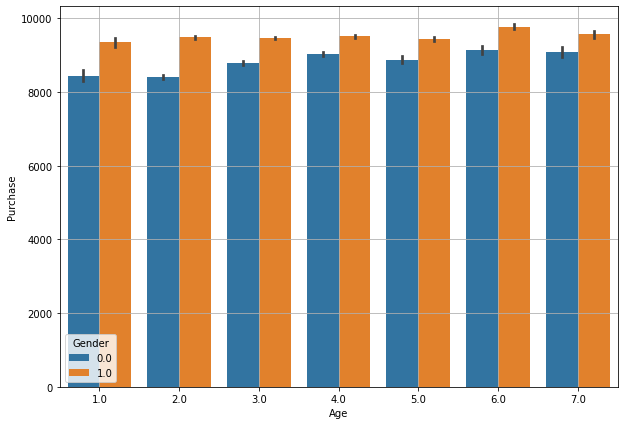

In [48]:
#visualisation of AGE v/s PURCHASE
plt.figure(figsize=(10,7))
sns.barplot('Age' , 'Purchase' , hue='Gender' , data=df)
plt.grid(axis='both')
plt.show()

###Observation
Male -> 1
Female -> 0

x axis -> '0-17' : 1 , '18-25' : 2 , '26-35' : 3 ,'36-45' : 4 ,'46-50' : 5 , '51-55': 6 ,  '55+' : 7

1. Males dominate the buying trend
2. Purchasing for all the age categories are almost uniform

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


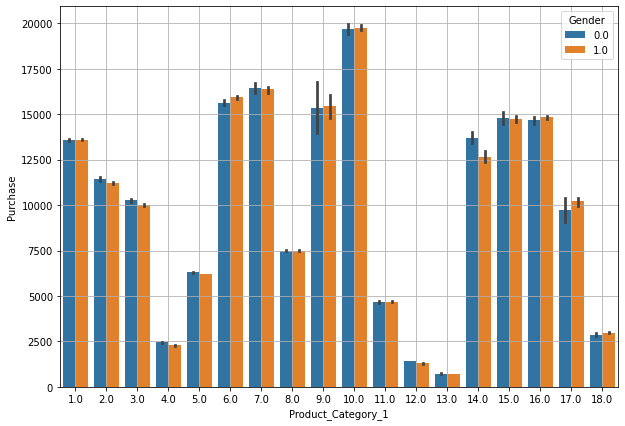

In [52]:
#visualisation of product category v/s purchase

plt.figure(figsize=(10,7))
sns.barplot('Product_Category_1' , 'Purchase' , hue='Gender' , data=df)
plt.grid(axis='both')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


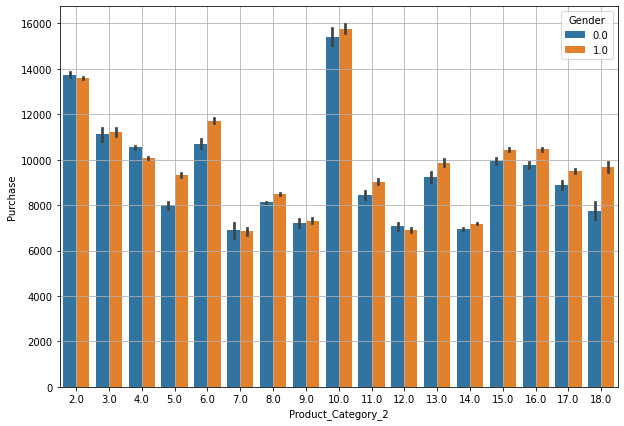

In [55]:
plt.figure(figsize=(10,7))
sns.barplot('Product_Category_2' , 'Purchase' , hue='Gender' , data=df)
plt.grid(axis='both')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


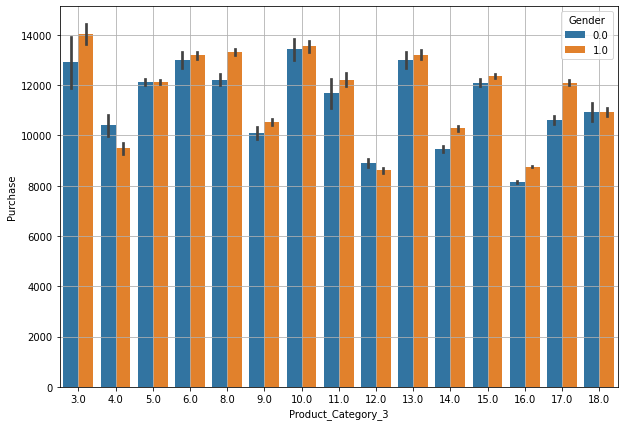

In [56]:
plt.figure(figsize=(10,7))
sns.barplot('Product_Category_3' , 'Purchase' , hue='Gender' , data=df)
plt.grid(axis='both')

plt.show()

###Observation 
1. Product category 1 has highest purchase
2. Product category 1 is bought by both males and females at almost simlar volumes

##Feature Scaling

In [60]:
df_test=df[df['Purchase'].isnull()]

In [61]:
df_train=df[~df['Purchase'].isnull()]

In [62]:
X=df_train.drop('Purchase',axis=1)

In [63]:
X.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,P00069042,0.0,1.0,10.0,2.0,0.0,3.0,8.0,16.0,1,0,0
1,P00248942,0.0,1.0,10.0,2.0,0.0,1.0,6.0,14.0,1,0,0


In [64]:

X.shape

(451747, 12)

In [65]:
y=df_train['Purchase']

In [66]:
y.shape

(451747,)

In [67]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
451742     1756.0
451743    19959.0
451744    10041.0
451745    16095.0
451746     7084.0
Name: Purchase, Length: 451747, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [69]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [70]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

###Data is now ready to be trained